##This file is the Average Temperature timeseries graph in 2001 vs 2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

data = pd.read_csv('California_official.csv')
display(data)

,County,Date,Tree Coverage Loss,Avg Temp,Avg Precipitation,Ozone,Nitrogen Dioxide,Floods,Wildfire
0,Alameda,2001,60.0,59.6,22.27,0.087,0.040,0,0
1,Alameda,2002,15.0,59.0,18.34,0.106,0.040,2,0
2,Alameda,2003,62.0,59.7,16.43,0.094,0.035,0,0
3,Alameda,2004,69.0,59.6,18.35,0.080,0.034,0,0
4,Alameda,2005,36.0,59.4,24.52,0.090,0.034,1,0
...,...,...,...,...,...,...,...,...,...
455,Yolo,2016,279.0,63.1,22.92,0.072,0.015,0,0
456,Yolo,2017,58.0,63.1,30.74,0.071,0.014,0,0
457,Yolo,2018,3230.0,62.4,17.84,0.080,0.018,0,0
458,Yolo,2019,400.0,62.4,33.14,0.066,0.013,12,1


In [2]:
data1 = data.copy()
data1 = data1.drop(columns=['Tree Coverage Loss'])
Temp = data1.iloc[:,0:3]
display(Temp)

,County,Date,Avg Temp
0,Alameda,2001,59.6
1,Alameda,2002,59.0
2,Alameda,2003,59.7
3,Alameda,2004,59.6
4,Alameda,2005,59.4
...,...,...,...
455,Yolo,2016,63.1
456,Yolo,2017,63.1
457,Yolo,2018,62.4
458,Yolo,2019,62.4


In [3]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')
n = 24 #number of state

In [4]:
#filter 2001
year_01 = Temp.loc[(Temp['Date'] == 2001)]
year_01 = year_01.reset_index()
year_01 = year_01.drop(columns=['index'])
county = year_01.iloc[:,0]
#filter 2020
temp_2001 = year_01.iloc[:,2]
year_20 = Temp.loc[(Temp['Date'] == 2020)]
year_20 = year_20.reset_index()
year_20 = year_20.drop(columns=['index'])
temp_2020 = year_20.iloc[:,2]

In [5]:
n = 23 #number of state
data2 = pd.DataFrame(columns=['county','before','after','change'], index=range(n))
data2.loc[:,'county'] = year_01.iloc[:,0]
data2.loc[:,'before'] = year_01.iloc[:,2]
data2.loc[:,'after'] = year_20.iloc[:,2]
data2.loc[:,'change'] = data2['after'] - data2['before']
# display(data2)
# data2.head()

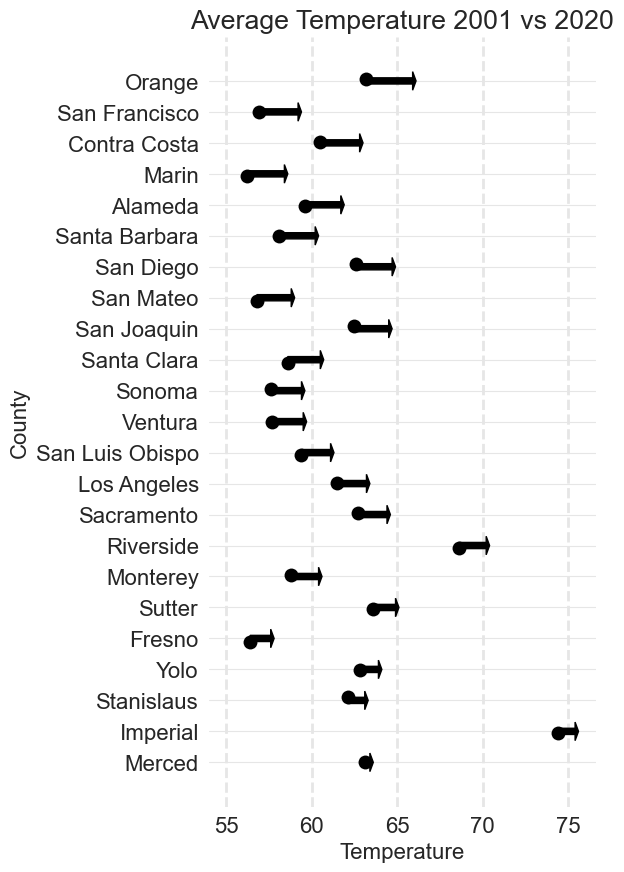

In [6]:
data2 = data2.sort_values(by='change', ascending=False) \
           .reset_index(drop=True)
ax = plt.figure(figsize=(5,10))
#add start points
ax = sns.stripplot(data=data2, 
                   x='before', 
                   y='county', 
                   orient='h', 
                   order=data2['county'], 
                   size=10, 
                   color='black')
#define arrows
arrow_starts = data2['before'].values
arrow_lengths = data2['after'].values - arrow_starts
# display(arrow_starts)
#add arrows to plot
for i, county in enumerate(data2['county']):
    ax.arrow(arrow_starts[i],        #x start point
             i,                      #y start point
             arrow_lengths[i],       #change in x 
             0,                      #change in y
             head_width=0.6,         #arrow head width
             head_length=0.2,        #arrow head length
             width=0.2,              #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color
    
#format plot
ax.set_title('Average Temperature 2001 vs 2020')   #add title
ax.axvline(x=55, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.axvline(x=60, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.axvline(x=65, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.axvline(x=70, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.axvline(x=75, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.grid(axis='y', color='0.9')                        #add a light grid
# ax.set_xlim(-2,2)                                     #set x axis limits
ax.set_xlabel('Temperature')                                #label the x axis
ax.set_ylabel('County')                          #label the y axis
sns.despine(left=True, bottom=True)                   #remove axes